In [7]:
import pandas as pd
from plotnine import *
import plotnine
import numpy as np

from kmodes.kprototypes import KPrototypes
# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
# Format scientific notation from Pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
music_data = pd.read_csv('../data/final_merged.csv')

In [3]:
music_data

release_date         artist  \
0       2018-02-23        L D R U   
1       2018-02-23        L D R U   
2       2018-02-23        L D R U   
3       2018-02-23        L D R U   
4       2018-02-23        L D R U   
...            ...            ...   
40771   2003-08-19  Kings of Leon   
40772   2003-08-19  Kings of Leon   
40773   2003-08-19  Kings of Leon   
40774   2003-08-19  Kings of Leon   
40775   2003-08-19  Kings of Leon   

                                               name                    album  \
0             The Calling - ORIENTAL CRAVINGS Remix        Sizzlar (Remixes)   
1      Keeping Score (feat. Paige IV) - Paces Remix        Sizzlar (Remixes)   
2             Take My (feat. Rob Taylor) - UZ Remix        Sizzlar (Remixes)   
3      Next to You (feat. Savoi) - Yomi Twice Remix        Sizzlar (Remixes)   
4                        Pop That - Sub-human Remix        Sizzlar (Remixes)   
...                                             ...                      ...   
40771                              Molly's Chambers  Youth And Young Manhood   
40772                                        Genius  Youth And Young Manhood   
40773                                         Dusty  Youth And Young Manhood   
40774                         Holy Roller Novocaine  Youth And Young Manhood   
40775                                  Talihina Sky  Youth And Young Manhood   

       popularity  danceability  energy  key  loudness  mode  speechiness  \
0               8         0.531   0.816   10    -4.240     0        0.102   
1              16         0.687   0.758    5    -5.285     0        0.056   
2              11         0.746   0.944    8    -5.525     0        0.246   
3               7         0.433   0.668    6    -7.694     1        0.044   
4               7         0.635   0.844    4    -6.086     1        0.097   
...           ...           ...     ...  ...       ...   ...          ...   
40771          63         0.598   0.911   11    -3.970     1        0.051   
40772          41         0.442   0.830    7    -5.978     1        0.048   
40773          39         0.661   0.519    9    -7.192     1        0.030   
40774          49         0.571   0.735   11    -5.632     0        0.074   
40775          41         0.642   0.522   11    -5.654     0        0.026   

       acousticness  instrumentalness  liveness  valence   tempo  \
0             0.421             0.000     0.475    0.310 153.974   
1             0.109             0.000     0.185    0.441  91.911   
2             0.002             0.341     0.169    0.533 140.108   
3             0.009             0.000     0.113    0.324 100.008   
4             0.137             0.331     0.379    0.220  75.031   
...             ...               ...       ...      ...     ...   
40771         0.222             0.000     0.216    0.953 146.469   
40772         0.028             0.000     0.218    0.506 125.554   
40773         0.162             0.000     0.085    0.313 105.034   
40774         0.033             0.000     0.215    0.557 106.811   
40775         0.243             0.000     0.091    0.391 114.431   

       duration_ms_y                      id  
0             180779  3egj44N2tiuW5F2MrqmBjW  
1             205000  1WAWbKpQe3XMp4b96bjazD  
2             195097  1HFIgvDlSCjC95Ch6h6gF7  
3             223764  0mEYJIIBcUt2GH4ftYKJ5Q  
4             219200  0vQ5VW753vuqUdi4mipjVl  
...              ...                     ...  
40771         134906  0nCAVzknkzRXRgB6LhRv04  
40772         168840  3iUUve7vVMnS4zHLWpv3mh  
40773         260399  3iYPdrNM4hzxfhmMhb3UoT  
40774         243000  5fv9AxkRVzCwT5XkpYjWvL  
40775         227440  7GWViYkd4fTS3ApKuaTLEB  

[40776 rows x 18 columns]

In [4]:
music_data['artist'].value_counts()

The Beach Boys    690
Arcade Player     489
The Beatles       461
David Bowie       411
Fleetwood Mac     396
                 ... 
Sil                 1
Blastoyz            1
HP Source           1
Norin & Rad         1
Krister             1
Name: artist, Length: 2295, dtype: int64

In [5]:
music_data['release_date'] = pd.to_datetime(music_data['release_date'])

In [8]:
music_data['Seconds']=music_data['release_date'].map(pd.Timestamp.timestamp)

day = 60*60*24
year = 365.2425*day
music_data['year sin'] = np.sin(music_data['Seconds'] * (2*np.pi/year))
music_data['year cos'] = np.cos(music_data['Seconds'] * (2*np.pi/year))
music_data

release_date         artist  \
0       2018-02-23        L D R U   
1       2018-02-23        L D R U   
2       2018-02-23        L D R U   
3       2018-02-23        L D R U   
4       2018-02-23        L D R U   
...            ...            ...   
40771   2003-08-19  Kings of Leon   
40772   2003-08-19  Kings of Leon   
40773   2003-08-19  Kings of Leon   
40774   2003-08-19  Kings of Leon   
40775   2003-08-19  Kings of Leon   

                                               name                    album  \
0             The Calling - ORIENTAL CRAVINGS Remix        Sizzlar (Remixes)   
1      Keeping Score (feat. Paige IV) - Paces Remix        Sizzlar (Remixes)   
2             Take My (feat. Rob Taylor) - UZ Remix        Sizzlar (Remixes)   
3      Next to You (feat. Savoi) - Yomi Twice Remix        Sizzlar (Remixes)   
4                        Pop That - Sub-human Remix        Sizzlar (Remixes)   
...                                             ...                      ...   
40771                              Molly's Chambers  Youth And Young Manhood   
40772                                        Genius  Youth And Young Manhood   
40773                                         Dusty  Youth And Young Manhood   
40774                         Holy Roller Novocaine  Youth And Young Manhood   
40775                                  Talihina Sky  Youth And Young Manhood   

       popularity  danceability  energy  key  loudness  mode  ...  \
0               8         0.531   0.816   10    -4.240     0  ...   
1              16         0.687   0.758    5    -5.285     0  ...   
2              11         0.746   0.944    8    -5.525     0  ...   
3               7         0.433   0.668    6    -7.694     1  ...   
4               7         0.635   0.844    4    -6.086     1  ...   
...           ...           ...     ...  ...       ...   ...  ...   
40771          63         0.598   0.911   11    -3.970     1  ...   
40772          41         0.442   0.830    7    -5.978     1  ...   
40773          39         0.661   0.519    9    -7.192     1  ...   
40774          49         0.571   0.735   11    -5.632     0  ...   
40775          41         0.642   0.522   11    -5.654     0  ...   

       acousticness  instrumentalness  liveness  valence   tempo  \
0             0.421             0.000     0.475    0.310 153.974   
1             0.109             0.000     0.185    0.441  91.911   
2             0.002             0.341     0.169    0.533 140.108   
3             0.009             0.000     0.113    0.324 100.008   
4             0.137             0.331     0.379    0.220  75.031   
...             ...               ...       ...      ...     ...   
40771         0.222             0.000     0.216    0.953 146.469   
40772         0.028             0.000     0.218    0.506 125.554   
40773         0.162             0.000     0.085    0.313 105.034   
40774         0.033             0.000     0.215    0.557 106.811   
40775         0.243             0.000     0.091    0.391 114.431   

       duration_ms_y                      id        Seconds  year sin  \
0             180779  3egj44N2tiuW5F2MrqmBjW 1519344000.000     0.794   
1             205000  1WAWbKpQe3XMp4b96bjazD 1519344000.000     0.794   
2             195097  1HFIgvDlSCjC95Ch6h6gF7 1519344000.000     0.794   
3             223764  0mEYJIIBcUt2GH4ftYKJ5Q 1519344000.000     0.794   
4             219200  0vQ5VW753vuqUdi4mipjVl 1519344000.000     0.794   
...              ...                     ...            ...       ...   
40771         134906  0nCAVzknkzRXRgB6LhRv04 1061251200.000    -0.728   
40772         168840  3iUUve7vVMnS4zHLWpv3mh 1061251200.000    -0.728   
40773         260399  3iYPdrNM4hzxfhmMhb3UoT 1061251200.000    -0.728   
40774         243000  5fv9AxkRVzCwT5XkpYjWvL 1061251200.000    -0.728   
40775         227440  7GWViYkd4fTS3ApKuaTLEB 1061251200.000    -0.728   

       year cos  
0         0.607  
1         0.607  
2         0.607  
3    

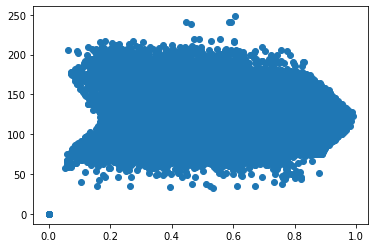

In [29]:
plt.scatter(music_data['danceability'], music_data['tempo'])

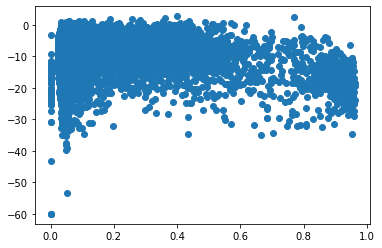

In [10]:
plt.scatter(music_data['speechiness'], music_data['loudness'])

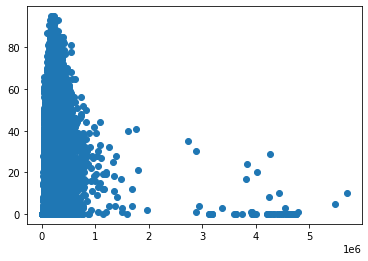

In [11]:
plt.scatter(music_data['duration_ms_y'], music_data['popularity'])

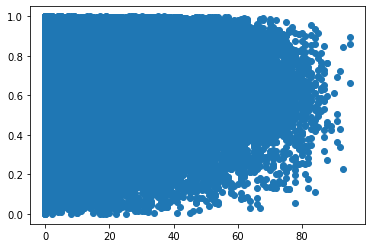

In [12]:
plt.scatter(music_data['popularity'], music_data['energy'])

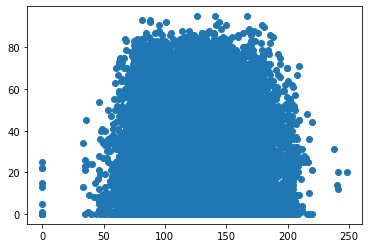

In [13]:
plt.scatter(music_data['tempo'], music_data['popularity'])

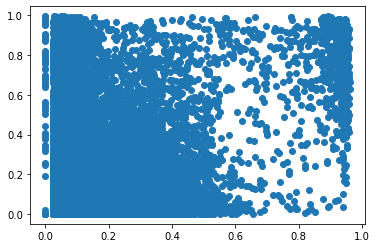

In [14]:
plt.scatter(music_data['speechiness'], music_data['acousticness'])

In [15]:
features = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms_y', 'pop_dance', 'year cos']

In [16]:
music_data['loud_key'] = music_data['loudness'] * music_data['key']

In [17]:
music_data['dur_tmp'] = music_data['tempo'] * music_data['duration_ms_y']

In [18]:
music_data['pop_temp'] = music_data['tempo'] * music_data['popularity']

In [19]:
music_data['year_dance'] = music_data['year cos'] * music_data['danceability']

In [20]:
music_data['en_pop_dan'] = music_data['energy'] * music_data['popularity'] * music_data['danceability']

In [21]:
music_data['pop_tempo_yeae'] = music_data['popularity'] * music_data['tempo'] * music_data['year cos']

In [22]:
music_data['val_en_dance'] = music_data['energy'] * music_data['valence'] * music_data['danceability']

In [23]:
music_data['val_temp'] = music_data['valence'] * music_data['tempo']

In [24]:
music_data['year_loud'] = music_data['year cos'] * music_data['loudness']

In [25]:
music_data['ac_in'] = music_data['acousticness'] * music_data['instrumentalness']

In [26]:
music_data['tempo_dance'] = music_data['tempo'] * music_data['danceability']

In [27]:
music_data['en_pop'] = music_data['popularity'] * music_data['energy']

In [28]:
import plotly.express as px
fig = px.scatter_matrix(music_data[features],
width=1200, height=1600)
fig.show()

KeyError: "['pop_dance'] not in index"

In [223]:
#https://towardsdatascience.com/clustering-with-more-than-two-features-try-this-to-explain-your-findings-b053007d680a
fig1 = px.scatter(music_data, x='danceability', y="tempo", color="year cos", size ='val_en')
fig1.update_layout(title="4 Features Representation")
fig1.show()

In [237]:
fig2 = px.scatter_3d(music_data, x='year_dance', y="tempo", z = "en_pop", color="valence", size ='popularity')
fig2.update_layout(title="5 Features Representation")
fig2.update_layout(
    autosize=False,
    width=1200,
    height=1200,)
fig2.show()

In [270]:
new_features=['val_en', "loud_key", "en_pop", 'year_dance', 'pop_temp'] 

In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
import numpy as np
X=music_data[new_features]
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)
inertia = []
for i in range(1,11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11),y=inertia))
fig.update_layout(title="Inertia vs Cluster Number",xaxis=dict(range=[0,11],title="Cluster Number"),
                  yaxis={'title':'Inertia'},
                 annotations=[
        dict(
            x =3,
            y=inertia[2],
            xref="x",
            yref="y",
            text="Elbow!",
            showarrow=True,
            arrowhead=7,
            ax=20,
            ay=-40
        )
    ])

NameError: name 'music_data' is not defined

In [272]:
kmeans = KMeans(
        n_clusters=3, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
    )
kmeans.fit(X)
clusters=pd.DataFrame(X,columns=music_data[new_features].columns)
clusters['label']=kmeans.labels_
polar=clusters.groupby("label").mean().reset_index()
polar=pd.melt(polar,id_vars=["label"])
fig4 = px.line_polar(polar, r="value", theta="variable", color="label", line_close=True,height=800,width=1400)
fig4.show()